### Lab3 
### EXERCISE 1 : Perform data analysis and visualization on the movies.csv data set and answer the given questions.
### DATE : 09-09-2022
### Name : Kartabya Krishna
### RegNo : 210968244
### Batch : 4

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime as dt

In [42]:
df = pd.read_csv("bollywood.csv")

In [43]:
df.set_index("SlNo", inplace = True)
df

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
SlNo,,,,,,,,,
1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...
145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807


###   Q1. How many records are present in the dataset?

In [45]:
df.shape[0]

149

### Q2. How many movies got released in each genre? Sort number of releases in each genre in descending order

In [47]:
df["Genre"] = df["Genre"].str.strip()
df["Genre"].value_counts()

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

### Q3. Which genre had highest number of releases? 

In [49]:
df["Genre"] = df["Genre"].str.strip()
Best_Genre = df["Genre"].value_counts()
Best_Genre=df["Genre"].value_counts().idxmax()
Best_Genre

'Comedy'

### Q4. How many movies in each genre got released in different release times like long weekend, festive season, etc.   (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [51]:
pd.crosstab(df.Genre, df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


### Q5. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [53]:
df["Release Date"] = pd.to_datetime(df["Release Date"])
df["Month"] = df["Release Date"].dt.month
df["Month"].value_counts().idxmax()

1

### Q6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [55]:
BestBudget=df[df['Budget'] >25]
BestBudget
BestBudget["Month"].value_counts().idxmax()

2

### Q7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [57]:
df['ROI'] = (df['BoxOfficeCollection'].astype(int)-df['Budget'].astype(int))/(df['Budget'].astype(int))
success = df.sort_values(by = "ROI", ascending = False).head(10)
success['MovieName']

SlNo
65                    Aashiqui 2
90                            PK
133                  Grand Masti
136                 The Lunchbox
88                        Fukrey
59                      Mary Kom
129                       Shahid
38     Humpty Sharma Ki Dulhania
102           Bhaag Milkha Bhaag
116              Chennai Express
Name: MovieName, dtype: object

### Q8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [59]:
df['ReleaseTime'].unique()
for i in df['ReleaseTime'].unique():
    print("average ROI in ",i,"=",df[df.ReleaseTime==i].ROI.mean())

average ROI in  LW = 1.1227460506145381
average ROI in  N = 0.6329986651353547
average ROI in  HS = 0.8278085830291713
average ROI in  FS = 0.9640072629842452


### Q9. Is there a correlation between box office collection and YouTube likes?  Is the correlation positive or negative?

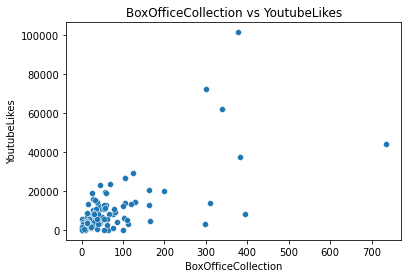

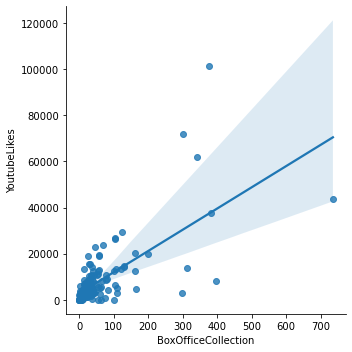

In [61]:
ax= sb.scatterplot(x="BoxOfficeCollection",y="YoutubeLikes",data=df)
ax.set_title("BoxOfficeCollection vs YoutubeLikes")
ax.set_xlabel("BoxOfficeCollection")
sb.lmplot(x="BoxOfficeCollection",y="YoutubeLikes",data=df)

In [62]:
print("Correlation is, ",round(df['BoxOfficeCollection'].corr(df['YoutubeLikes']),5))

Correlation is,  0.68252


### Q10. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

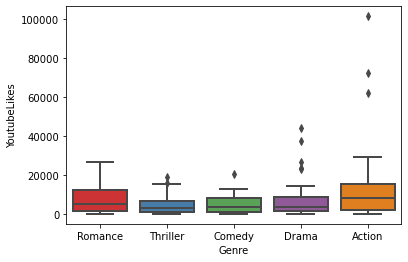

In [78]:
sb.boxplot(x="Genre", y="YoutubeLikes", data=df, palette="Set1", linewidth=2)

### Q11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated?  Note: Draw pair plot or heatmap.

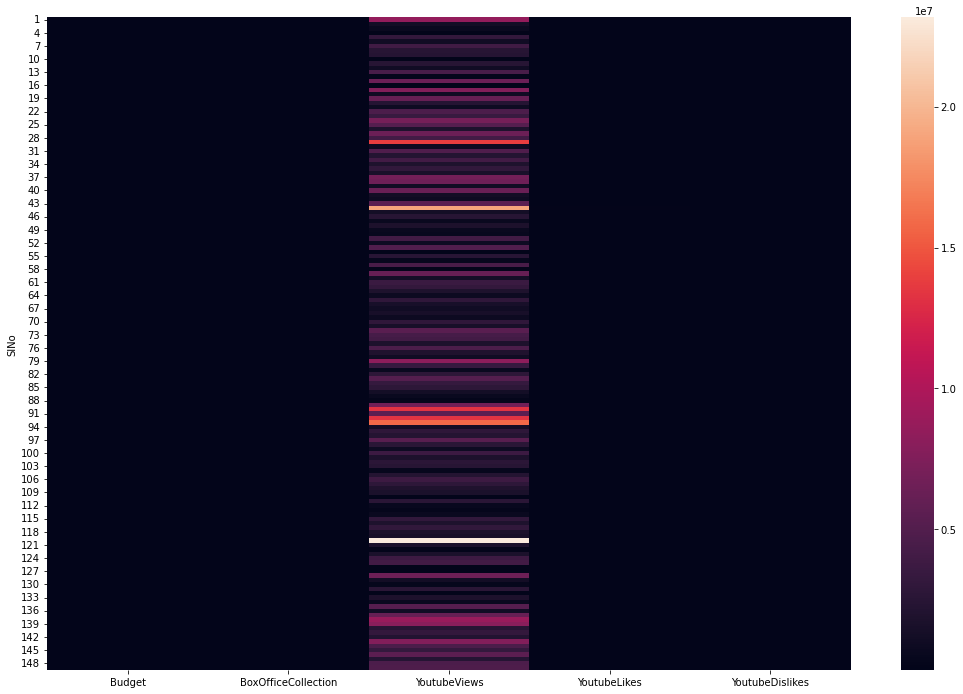

In [66]:
fig=plt.figure(figsize=(18,12))
ax=sb.heatmap(df[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']])
plt.show()

### Q12. During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.

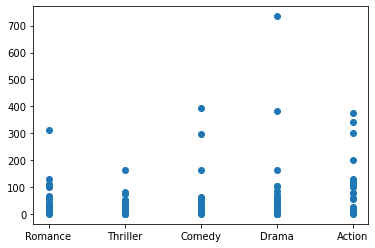

In [68]:
plt.scatter(df.Genre,df.BoxOfficeCollection)
plt.show()

### Q13. Visualize the Budget and Box office collection based on Genre.

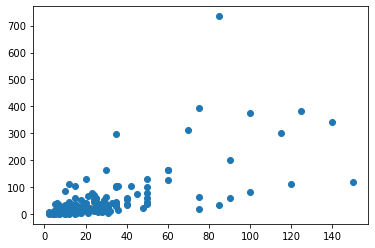

In [79]:
plt.scatter(df.Budget,df.BoxOfficeCollection)
plt.show()

### Q14. Find the distribution of movie budget for every Genre.

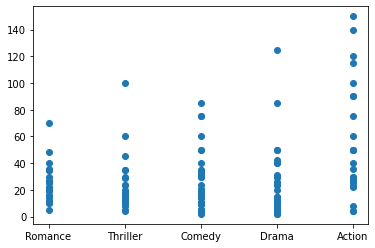

In [72]:
plt.scatter(df.Genre,df.Budget)
plt.show()

### Q15. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.

<AxesSubplot:xlabel='Year'>

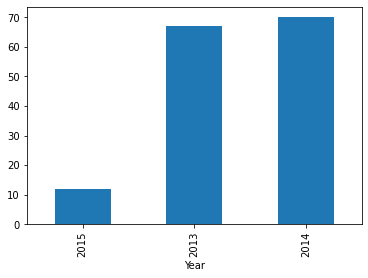

In [77]:
df['Year']=pd.DatetimeIndex(df['Release Date']).year
df15=pd.crosstab(df.Year,df.shape[0]).sort_values(by=[df.shape[0]])
df15
df15[df.shape[0]].plot.bar()